In [1]:
import torch
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
# Dummy segmentation model for illustration
class SimpleSegmentationModel(nn.Module):
    def __init__(self, num_classes):
        super(SimpleSegmentationModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, num_classes, kernel_size=3, stride=1, padding=1)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.conv2(x)
        return x

In [ ]:
# Load image and preprocess
def load_image(image_path):
    image = Image.open(image_path).convert("RGB")
    transform = transforms.Compose([
        transforms.ToTensor()
    ])
    return transform(image).unsqueeze(0)  # Add batch dimension

In [ ]:
# Calculate Pixel Accuracy
def pixel_accuracy(pred, target):
    correct = (pred == target).sum().item()
    total = target.numel()
    return correct / total


In [ ]:
# Calculate Mean IoU
def mean_iou(pred, target, num_classes):
    iou_list = []
    pred = pred.view(-1)
    target = target.view(-1)
    for cls in range(num_classes):
        pred_inds = (pred == cls)
        target_inds = (target == cls)
        intersection = (pred_inds & target_inds).sum().item()
        union = (pred_inds | target_inds).sum().item()
        if union == 0:
            iou = 1
        else:
            iou = intersection / union
        iou_list.append(iou)
    return np.mean(iou_list)


In [ ]:
# Calculate Dice Coefficient
def dice_coefficient(pred, target, num_classes):
    dice_list = []
    pred = pred.view(-1)
    target = target.view(-1)
    for cls in range(num_classes):
        pred_inds = (pred == cls)
        target_inds = (target == cls)
        intersection = (pred_inds & target_inds).sum().item()
        dice = (2 * intersection) / (pred_inds.sum().item() + target_inds.sum().item())
        dice_list.append(dice)
    return np.mean(dice_list)

In [ ]:

# Display the segmented image
def display_image(image, title="Segmented Image"):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()


In [ ]:
# Main function
def main(image_path):
    num_classes = 2  # Example: Background and Object
    image = load_image(image_path)

    # Initialize a simple model and make a dummy prediction
    model = SimpleSegmentationModel(num_classes=num_classes)
    with torch.no_grad():
        logits = model(image)
        prediction = torch.argmax(logits, dim=1)  # Convert logits to predicted class

    # Assume a dummy ground truth (you should replace this with actual labels)
    ground_truth = torch.zeros_like(prediction)  # Example: All background

    # Calculate and print the performance indicators
    acc = pixel_accuracy(prediction, ground_truth)
    miou = mean_iou(prediction, ground_truth, num_classes=num_classes)
    dice = dice_coefficient(prediction, ground_truth, num_classes=num_classes)

    print(f"Pixel Accuracy: {acc:.4f}")
    print(f"Mean IoU: {miou:.4f}")
    print(f"Dice Coefficient: {dice:.4f}")

    # Display the predicted segmentation
    display_image(prediction.squeeze().numpy(), title="Segmented Image")

Pixel Accuracy: 0.8119
Mean IoU: 0.4059
Dice Coefficient: 0.4481


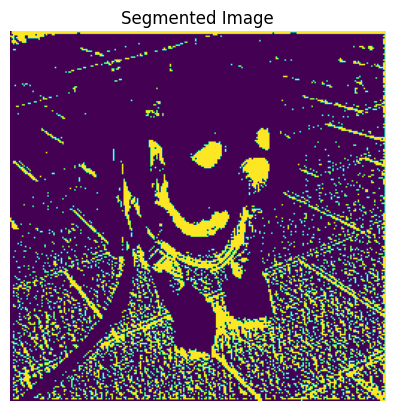

In [3]:
# Example image path
image_path = '/content/dog1.PNG'
main(image_path)
